# Ecoulement avec force de frottement en volume

In [1]:
from trustutils import run 

run.introduction('D. Jamet')

## Introduction 
 Validation made by : D. Jamet



 Report generated 25/01/2022

### Description

On considère un problème de conduction thermique stationnaire unidimensionnel simple.  Afin de tester le  codage  en  trois  dimensions,  ce  problème  est  résolu  sur  un  parallélépipède  rectangles  dont  les  axes principaux ne sont pas alignés avec les axes du repère.  La solution numérique du problème est comparée à sa solution analytique.  Le calcul est fait en trois dimensions bien que le problème soit unidimensionne la fin de détecter des erreurs éventuelles de codage.

In [2]:
run.TRUST_parameters()

### TRUST parameters 
 * Version TRUST: 1.8.4
 * Binary used: /volatile/catA/ll258196/trust-code/exec/TRUST_mpi_opt (built on TRUST /volatile/catA/ll258196/trust-code/Validation/Rapports_automatiques/jupyter/EF/EF_Frottement_incline/build)

In [3]:
from trustutils import run 
import os
c1 = run.addCase(".","frottement_incline.data") 
run.printCases()
run.runCases()

### Test cases 
* ./frottement_incline.data : 


Running **with Sserver**...
  => A total of 1 cases were (successfully) run in 0.2s.


## Champs de vitesse et de pression 
### Erreurs des champs de pression et de vitesse calculés
L'erreur des champs de pression et de vitesse calculés par GENEPI par rapport à la solution analytique est tracée.

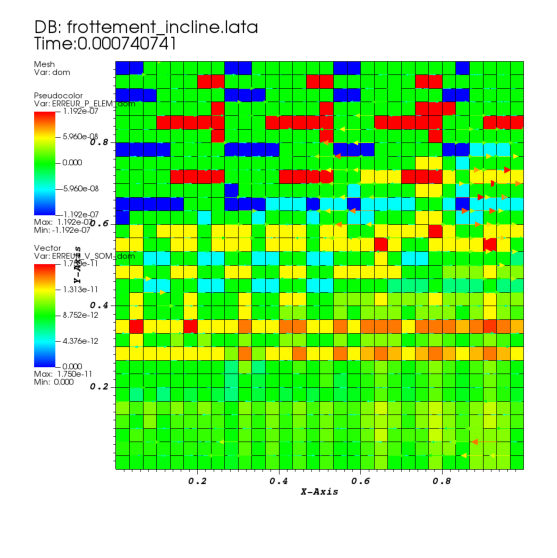

In [4]:
from trustutils import visit

Graphique=visit.Show("./frottement_incline.lata","Mesh","dom",plotmesh=False)
Graphique.visitCommand("DefineScalarExpression(\"P_ANALYTIQUE_ELEM_dom\",\"((sqrt(3.)/4.)*coord(dom)[0]-7./4.*coord(dom)[1])\") ")
Graphique.visitCommand("DefineScalarExpression(\"ERREUR_P_ELEM_dom\",\"(PRESSION_PA_ELEM_dom-P_ANALYTIQUE_ELEM_dom)\") ")
Graphique.visitCommand("DefineVectorExpression(\"V_ANALYTIQUE_SOM_dom\",\"{(0.),(1.)}\") ")
Graphique.visitCommand("DefineVectorExpression(\"ERREUR_V_SOM_dom\",\"(VITESSE_SOM_dom-V_ANALYTIQUE_SOM_dom)\") ")
Graphique.addField("./frottement_incline.lata","Pseudocolor","ERREUR_P_ELEM_dom")
Graphique.addField("./frottement_incline.lata","Vector","ERREUR_V_SOM_dom")
Graphique.plot() 

## Data Files
### frottement_incline

In [5]:
from trustutils import run

run.dumpDataset("./frottement_incline.data")

 # Hydraulique 2D avec force de frottement volumique #
 
 dimension 2
 
 Pb_hydraulique pb
 
 Domaine dom
 
 Mailler dom
 {
         Pave Cavite
         {
                 Origine 0. 0.
                 Nombre_de_noeuds 31 31
                 Longueurs 1. 1.
         }
         {
                 Bord Gauche   X = 0.  0. <= Y <= 1.
                 Bord Droit    X = 1.  0. <= Y <= 1.
                 Bord Bas      Y = 0.  0. <= X <= 1.
                 Bord Haut     Y = 1.  0. <= X <= 1.
         }
 }
 
 EF dis
 
 Scheme_euler_explicit sch
 Read sch
 {
 	 tinit 0
 	 tmax 1.
 	 dt_min 5.e-7
 	 dt_max 5.e-3
 	 dt_impr 1.e-1
 	 dt_sauv 1.e-3
 	 seuil_statio 1.e-8
 	 seuil_statio 2.7e-05
 }
 
 Fluide_Incompressible eau
 Read eau
 {
 	 mu Champ_Fonc_XYZ dom 1 1.5
 	 rho Champ_Uniforme 1 2.
 }
 
 Associate pb dom
 Associate pb sch
 Associate pb eau
 
 Discretize pb dis
 
 Read pb
 {
 	 Navier_Stokes_standard
 	 {
                 methode_calcul_pression_initiale avec_sources_et_operateurs
 